## ANALISI PCA CON PREPROCESSING E SVD

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import plotly.express as px
import seaborn as sns

In [3]:
df=pd.read_excel('olive_oil.xlsx')
#sostituisco il nome della prima colonna con "Class"
df.rename(columns={'Unnamed: 0':'Class'}, inplace=True )
#rimuovo gli spazi dai nomi 
df.rename(columns=lambda x: x.strip(), inplace=True)

labels = labels = list(df['Class'].unique())

In [160]:
#Rimuovo la prima riga contentente solo Stringhe, creando così la matrice dei dati X
X = df.drop('Class', axis=1)
n,m = X.shape
print(f"{n}, {m}")
X.head()

382, 7


,palmitico,palmitoleico,stearico,oleico,linoleico,eicosanoico,linolenico
0,10.750000,0.75,2.26,78.230011,6.72,0.36,0.60
1,10.880000,0.73,2.24,77.089996,7.81,0.31,0.61
2,9.109999,0.54,2.46,81.129997,5.49,0.31,0.63
3,9.660000,0.57,2.40,79.519997,6.19,0.50,0.78
4,10.510000,0.67,2.59,77.709999,6.72,0.50,0.80


## Preprocessing - Autoscaling

In [195]:
X_after = (X - X.mean())/X.std()
X_after.head()

,palmitico,palmitoleico,stearico,oleico,linoleico,eicosanoico,linolenico
0,-0.967736,-1.046550,0.166397,1.054802,-1.149469,0.427719,0.353491
1,-0.896904,-1.080687,0.107213,0.816074,-0.718221,0.064310,0.396468
2,-1.861303,-1.404992,0.758238,1.662081,-1.636106,0.064310,0.482422
3,-1.561631,-1.353786,0.580686,1.324935,-1.359158,1.445265,1.127076
4,-1.098502,-1.183099,1.142935,0.945908,-1.149469,1.445265,1.213029


## SVD

In [202]:
U,s,Vt = np.linalg.svd(X_after,full_matrices=False,compute_uv=True)
V = Vt.T
S = np.diag(S)
print(f"X {X.shape} = U {U.shape} S {S.shape} V {V.shape}")

X (382, 7) = U (382, 7) S (7, 7) V (7, 7)


In [203]:
X_svd = np.dot(U, np.diag(S)) 

In [205]:
T = np.matmul(U,S) #Scores 
#T = U*S
P = S   #Loadings

Data = np.dot(T,P.T)
E = np.subtract(X,Data)
#X_pca = np.dot(T,P.T)
Eigen_pca = np.power(S,2)/(n-1)
#print(Eigen_pca)
print(X.iat[1,1], Data[1,1])

-1.0806874163105427 -205.79602932140665


<AxesSubplot:>

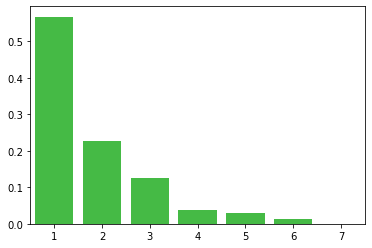

In [207]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")

Calcolo delle componenti principali

In [208]:
k = 3 #numero di componenti principali da calcolare
US_k = U[:, 0:k].dot(S[0:k, 0:k])
US_k.shape

(382, 3)

<AxesSubplot:>

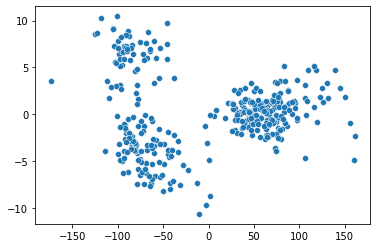

In [212]:
#PC1  e PC2
#sns.scatterplot(y=US_k[:,0], x=US_k[:,1])
sns.scatterplot(x=T[:,0], y=T[:,1])

<AxesSubplot:>

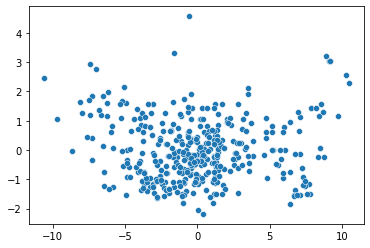

In [210]:
#PC2 E PC3
sns.scatterplot(x=US_k[:,1],y=US_k[:,2])

### da guardare https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/